In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### loading datasets

In [2]:
honda = pd.read_csv('Atlas Honda Limited.csv', parse_dates = ['Date'], index_col = 'Date')
indus = pd.read_csv('Indus Motor Company Limited.csv', parse_dates = ['Date'], index_col = 'Date')
honda.info()
indus.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4477 entries, 2001-01-01 to 2022-11-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4477 non-null   float64
 1   High    4477 non-null   float64
 2   Low     4477 non-null   float64
 3   Close   4477 non-null   float64
 4   Volume  4477 non-null   float64
dtypes: float64(5)
memory usage: 209.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5279 entries, 2001-01-01 to 2022-11-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5279 non-null   float64
 1   High    5279 non-null   float64
 2   Low     5279 non-null   float64
 3   Close   5279 non-null   float64
 4   Volume  5279 non-null   float64
dtypes: float64(5)
memory usage: 247.5 KB


In [3]:
honda.head()

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-01,15.0,16.5,15.0,16.5,2000.0
2001-01-08,16.5,17.5,17.5,17.5,500.0
2001-01-26,17.5,17.5,17.5,17.5,0.0
2001-02-08,17.5,17.0,17.0,17.0,500.0
2001-02-20,17.0,17.0,17.0,17.0,500.0


### check for missing values

In [4]:
missing_values = honda.isnull().sum()
missing_values

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
# as we can see their are no missing values

#now ensuring index is sorted
honda.sort_index(inplace=True)
honda.head()


,Open,High,Low,Close,Volume
Date,,,,,
2001-01-01,15.0,16.5,15.0,16.5,2000.0
2001-01-08,16.5,17.5,17.5,17.5,500.0
2001-01-26,17.5,17.5,17.5,17.5,0.0
2001-02-08,17.5,17.0,17.0,17.0,500.0
2001-02-20,17.0,17.0,17.0,17.0,500.0


In [6]:
honda.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-04,339.5,340.00,338.00,340.00,10000.0
2022-11-07,0.0,329.00,329.00,329.00,5000.0
2022-11-08,335.0,338.99,329.00,338.99,9200.0
2022-11-10,0.0,338.99,338.99,338.99,5800.0
2022-11-11,0.0,338.99,338.99,338.99,1000.0


### extracting data for year 2017 and 2018

In [7]:
honda_2017 = honda.loc["2017"]
honda_2018 = honda.loc["2018"]
honda_2017.shape

(227, 5)

##### the data 2017 and 2018 data contains less values than in a single year
##### It means some dates are missing 
##### let's fix that by creating our own date range to include all dates within the range

In [8]:
#creating date range to include all dates   
dates_2017 = pd.date_range(start = honda_2017.index.min(), end= honda_2017.index.max(), freq='B')
dates_2018 = pd.date_range(start = honda_2018.index.min(), end=honda_2018.index.max(), freq='B')

#reindexing both the dataFrames
honda_2017 = honda_2017.reindex(dates_2017)
honda_2018 = honda_2018.reindex(dates_2018)

#as we introduce new dates, it will generate null values, lets see in next cell

In [9]:
honda_2017.isnull().sum()
honda_2018.isnull().sum()

Open      37
High      37
Low       37
Close     37
Volume    37
dtype: int64

##### because there are missing values we need to handle them

In [10]:
# some methods for handling missing values are dropna(), fillna(), ffill, bfill, interpolate()
# here i used interpolate method to estimate missing value based on prev and next values
honda_2017.interpolate(inplace=True)
honda_2018.interpolate(inplace=True)

In [11]:
# let's check again is there still any missing value
honda_2017.isnull().sum() # 0 for all columns
honda_2018.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

##### now there are no missing values in our dataset

## Down sampling our data from daily to weekly
### Reason: To detect weekly and monthly trend useful for long term

In [12]:
weekly_2017 = honda_2017.resample('W').last()
monthly_2017 = honda_2017.resample('ME').last()

## now let's calculate weekly return and monthly returns in 2017

In [13]:
weekly_2017['Return'] = weekly_2017.Close.pct_change().mul(100).round(2)
# weekly_2017.head()

##### how pct_change works?
##### shift the price column by 1 and apply the formula *(price-shifted price)/shifted price*

In [14]:
weekly_2017.head()

,Open,High,Low,Close,Volume,Return
2017-01-08,609.99,612.0,600.01,608.29,7950.0,NaN
2017-01-15,605.01,606.0,603.00,604.47,5200.0,-0.63
2017-01-22,609.00,613.0,608.00,610.07,8450.0,0.93
2017-01-29,610.00,642.0,610.00,628.51,50050.0,3.02
2017-02-05,589.00,593.9,585.00,586.40,4050.0,-6.70


In [15]:
#monthly returns
monthly_2017['Return'] = monthly_2017.Close.pct_change().mul(100).round(2)
monthly_2017.head()

,Open,High,Low,Close,Volume,Return
2017-01-31,590.0,597.00,567.49,588.75,22250.0,NaN
2017-02-28,573.0,573.00,573.00,573.00,150.0,-2.68
2017-03-31,552.0,565.00,552.00,559.71,1150.0,-2.32
2017-04-30,597.9,597.90,585.70,590.25,9850.0,5.46
2017-05-31,640.0,649.99,640.00,644.87,4550.0,9.25


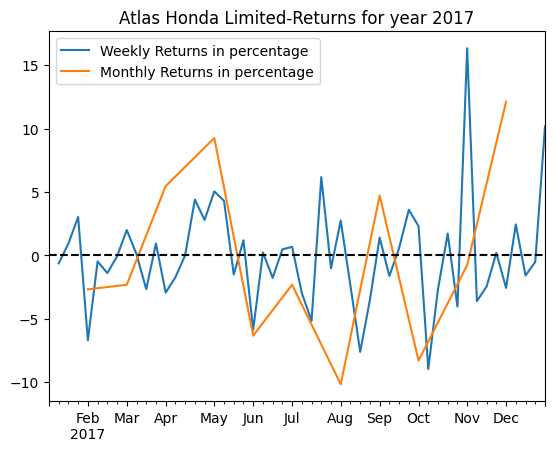

In [16]:
#visualizing returns

weekly_2017.Return.plot(label="Weekly Returns in percentage")
monthly_2017.Return.plot(label="Monthly Returns in percentage")
plt.axhline(0, color="black", linestyle="--")
plt.title("Atlas Honda Limited-Returns for year 2017")
plt.legend()
plt.show()

### Rolling window functions 
### Uses: Smoothing of data, analysing trend and patterns and calculating rolling statistics

In [17]:
honda_2017["7-Day MA"] = honda_2017.Close.rolling(window=7).mean()
honda_2017["20-Day MA"] = honda_2017.Close.rolling(window=20).mean()

In [18]:
honda_2017.tail()

,Open,High,Low,Close,Volume,7-Day MA,20-Day MA
2017-12-25,257.25,514.245,513.99,513.99,5550.0,510.688095,515.4930
2017-12-26,0.00,513.990,513.99,513.99,11000.0,510.305714,514.8925
2017-12-27,515.00,530.000,515.00,530.00,11950.0,512.448571,515.6175
2017-12-28,525.00,556.260,521.00,549.25,1800.0,517.317143,517.8300
2017-12-29,530.00,576.710,530.00,566.17,2750.0,526.770000,520.5135


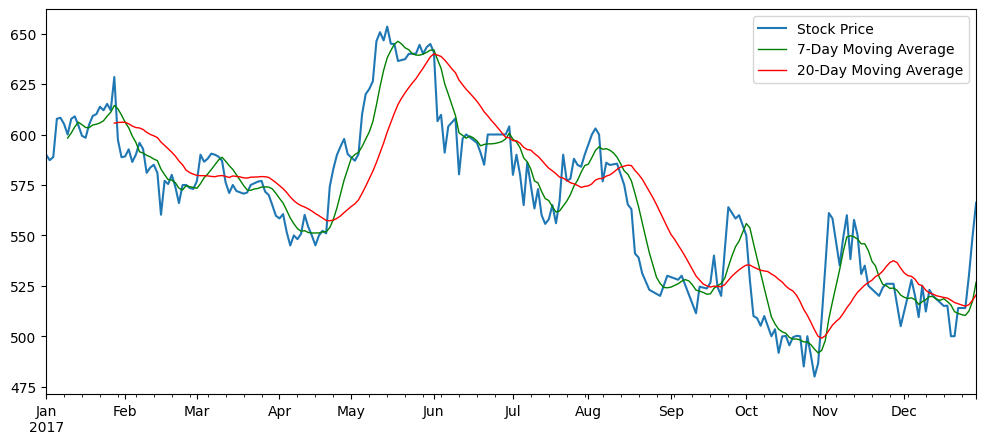

In [19]:
plt.figure(figsize=(12, 5))
honda_2017["Close"].plot(label="Stock Price")
honda_2017["7-Day MA"].plot(label="7-Day Moving Average", color="green", linewidth='1')
honda_2017["20-Day MA"].plot(label="20-Day Moving Average", color="red", linewidth='1')
plt.legend()
plt.show()

##### calculating monthly stock volatility in 2017 (how much the price fluctuates over a month)

In [20]:
honda_2017["Monthly_volatility"] = honda_2017.Close.rolling(window=30).std()

In [21]:
honda_2017.head()

,Open,High,Low,Close,Volume,7-Day MA,20-Day MA,Monthly_volatility
2017-01-02,588.00,594.00,585.00,590.00,3500.0,NaN,NaN,NaN
2017-01-03,580.10,596.98,580.10,587.28,6800.0,NaN,NaN,NaN
2017-01-04,590.00,592.00,588.01,588.84,6500.0,NaN,NaN,NaN
2017-01-05,590.00,613.99,590.00,607.78,31000.0,NaN,NaN,NaN
2017-01-06,609.99,612.00,600.01,608.29,7950.0,NaN,NaN,NaN


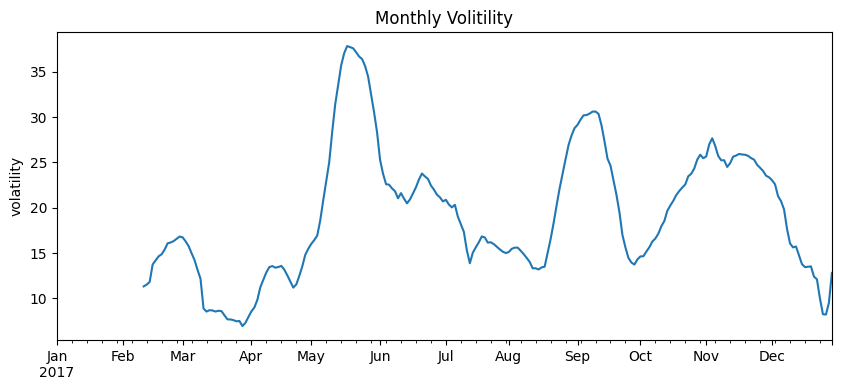

In [22]:
plt.figure(figsize=(10,4))
honda_2017.Monthly_volatility.plot(title="Monthly Volitility")
plt.ylabel("volatility")
plt.show()

##### show how much prices fluctuates
##### higher volitility --> higher risk

# Growth Rate comparison

### Normalizing closing price for *Honda Atlas Cars* and *Indus Motor* to prepare for comparison
##### Reason: Hard to compare at different levels 
##### 1. To reduce bias(may occur if one has larger values)
##### 2. Bring values on similar scale

In [23]:
honda_cars  = pd.read_csv('Honda Atlas Cars (Pakistan) Limited.csv', parse_dates=['Date'], index_col = 'Date')

In [24]:
honda_cars["Normalized_Close"] = honda_cars.Close / honda_cars.Close.iloc[0] * 100
# honda_cars["Normalized_Close"] = honda_cars.Close.div(honda_cars.Close.iloc[0]).mul(100)
indus["Normalized_Close"] = indus.Close / indus.Close.iloc[0] * 100 

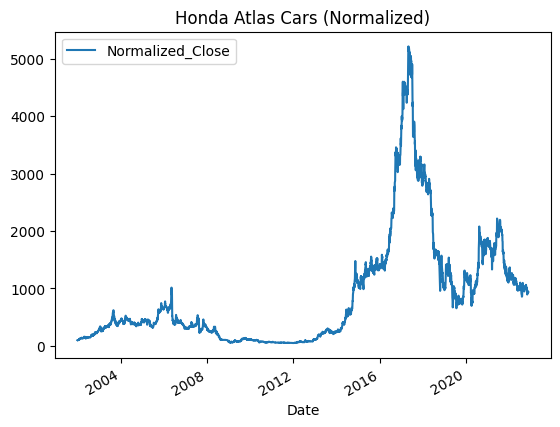

In [25]:
# plotting normalized stock price for honda_cars
honda_cars['Normalized_Close'].plot(title='Honda Atlas Cars (Normalized)')
plt.legend()

#### Comparing growth patterns of both stocks (Indus Motor and Honda Atlas Cars)

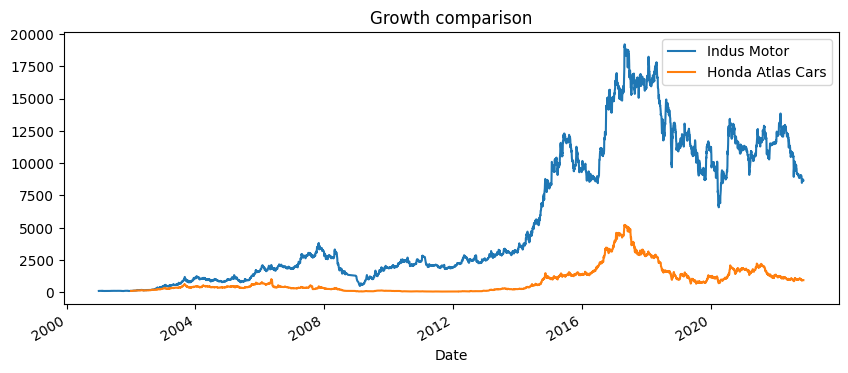

In [26]:
plt.figure(figsize=(10,4))
indus.Normalized_Close.plot(label="Indus Motor")
honda_cars.Normalized_Close.plot(label="Honda Atlas Cars")
plt.title("Growth comparison")
plt.legend()
plt.show()

In [27]:
import plotly.express as px

fig = px.line(honda, x=honda.index, y="Close", title="Stock Price Trends")
fig.show()


In [28]:
honda["YoY_Change"] = honda["Close"].pct_change(periods=365) * 100

over the last month i learned the basics of manipulating time series data using python so i decided to test my concepts
i picked stock price data for Atlas Honda company limited from kaggle
The goal was to analyze stock prices of year 2017
** Steps i followed**
1. Preprocess Data
The data contains no duplicates or missing values, however, there were some missing dates. To resolve this, i reindex the time series which created missing values. After applying linear interpolation, the missing values are estimated
2. Manipulation Time Series and feature engineering
. resample the prices for year 2017 to different time intervals (weekly and monthly)
. Computed weekly & monthly returns to track stock performance
. Calculated moving averages (7-day & 20-day) to smooth price fluctuations, Measured monthly volatility to assess risk.
3. Stock Performance and Growth Analysis
.Normalize stock prices for Honda Atlas Cars against INDUS Motor Company (belong to same sector) price to compare growth patterns over time.